# Task #3 : Exploratory Data Analysis - (Retail)
# **Creater : Satvik**

## Topic: Exploratory Data Analysis

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’\
● As a business manager, try to find out the weak areas where you can work to make more profit.\
● Tool Used **(Python)**

### To Explore: What all business problems you can derive by exploring the data?

### Import required libraries

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

### Load Daatset
● Data can be found at https://bit.ly/3i4rbWl

In [2]:
# Reading data from remote link
# url = "https://bit.ly/3i4rbWl"
# df = pd.read_csv(url)
# or

# Reading data from csv file
# Removal of Id column as it is not required for data analysis i.e clustering
df = pd.read_csv('SampleSuperstore.csv')
print("Data imported successfully")

# first 5 rows of the data
df.head()

Data imported successfully


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# last 5 rows of the data
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


### Getting the information about dataset

In [4]:
# Name of th columns of the data
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
# Shape of the data
print("{} Rows : {} Columns".format(df.shape[0],df.shape[1]))
# 9994 Rows : 13 Columns

9994 Rows : 13 Columns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# Creating the copy of the data
df2 = df.copy()

### Dropping unwanted columns

In [9]:
# Dropping unnecessary columns
df2.drop(['Country','Postal Code'],axis=1,inplace=True)
df2.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Displaying Total count of 'Category' & 'Segment'

In [10]:
# Displaying the total count of each 'Category'
pd.crosstab(index=df2['Category'],columns='count')

col_0,count
Category,
Furniture,2121
Office Supplies,6026
Technology,1847


In [11]:
# Displaying the total count of each 'Segment'
pd.crosstab(index=df2['Segment'],columns='count')

col_0,count
Segment,
Consumer,5191
Corporate,3020
Home Office,1783


In [12]:
# Numerical data
num_data = df2.select_dtypes(exclude=[object])
num_data.shape

(9994, 4)

### finding the correlation of numerical data

In [13]:
# finding the correlation of numerical data
corr = num_data.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


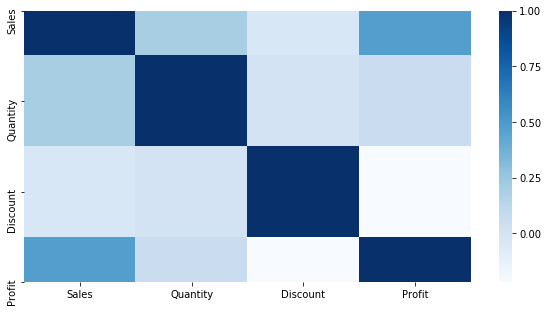

In [14]:
#Heatmap to know about the correlation between different features in the given dataset.

num_data=['Sales','Quantity','Discount','Profit']
plt.figure(figsize=(10,5))
sns.heatmap(df2[num_data].corr(), cmap="Blues")
corr_matrix=df2.corr()
print(corr_matrix)

Hence, we come to know that the correlation between "Profit" and "Sales" is "0.4791". This shows that there is a positive realtion between them.

Correlation between "Profit" and "Discount" is "-0.2194". This means that there is a weak negative relation between both of these numeric features.

### Distribution pot of Sales & Profit

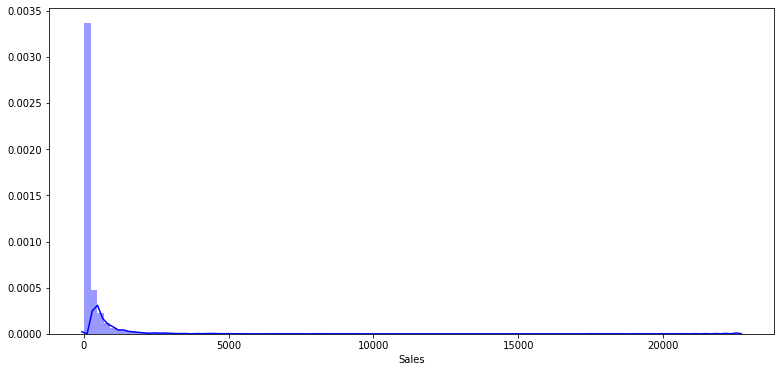

In [15]:
plt.figure(figsize=(13,6))
sns.distplot(df2['Sales'],bins=100,color='blue')

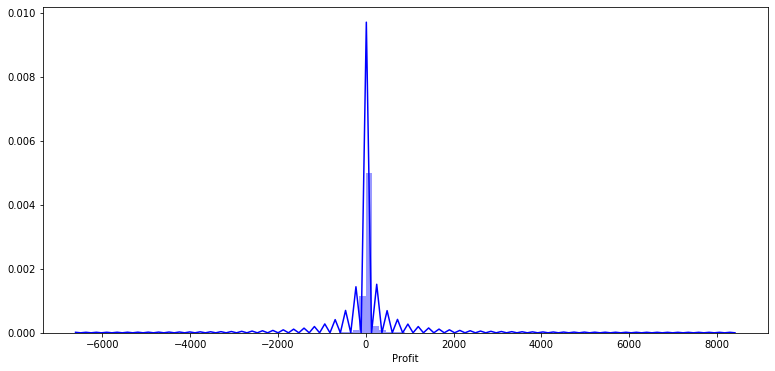

In [16]:
plt.figure(figsize=(13,6))
sns.distplot(df2['Profit'],bins=100,color='blue')

**Above Plot show the range of sales**
### Superstore Category and Sub-Category visualization

Text(0.5, 1.0, 'Superstore Categories')

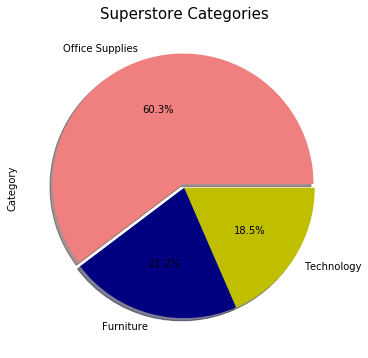

In [17]:
plt.figure(figsize=(15,6))
cat = df2['Category'].value_counts()

cmap = plt.get_cmap('Spectral')
colors = ['lightcoral','navy','y']
cat.plot.pie(autopct="%1.1f%%", shadow=True, colors=colors, explode = (0.03, 0, 0))
plt.title("Superstore Categories",fontsize=15)

**This pie chart represents that superstore has Office supplies more than furniture and Technology**

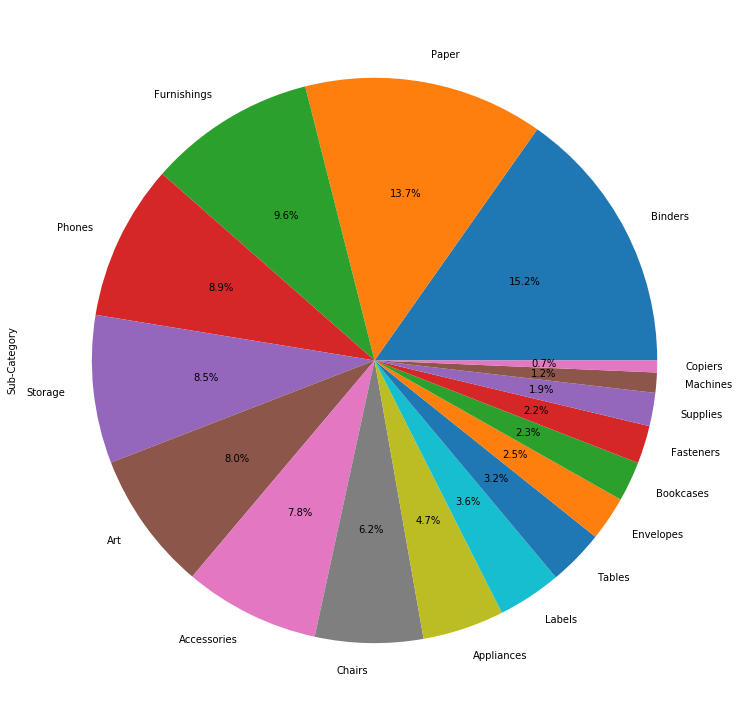

In [18]:
plt.figure(figsize=(13,13))
df2['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')

**By the above pie chart we can say that the papers and binders has wide variety**

C:\Users\satvi\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


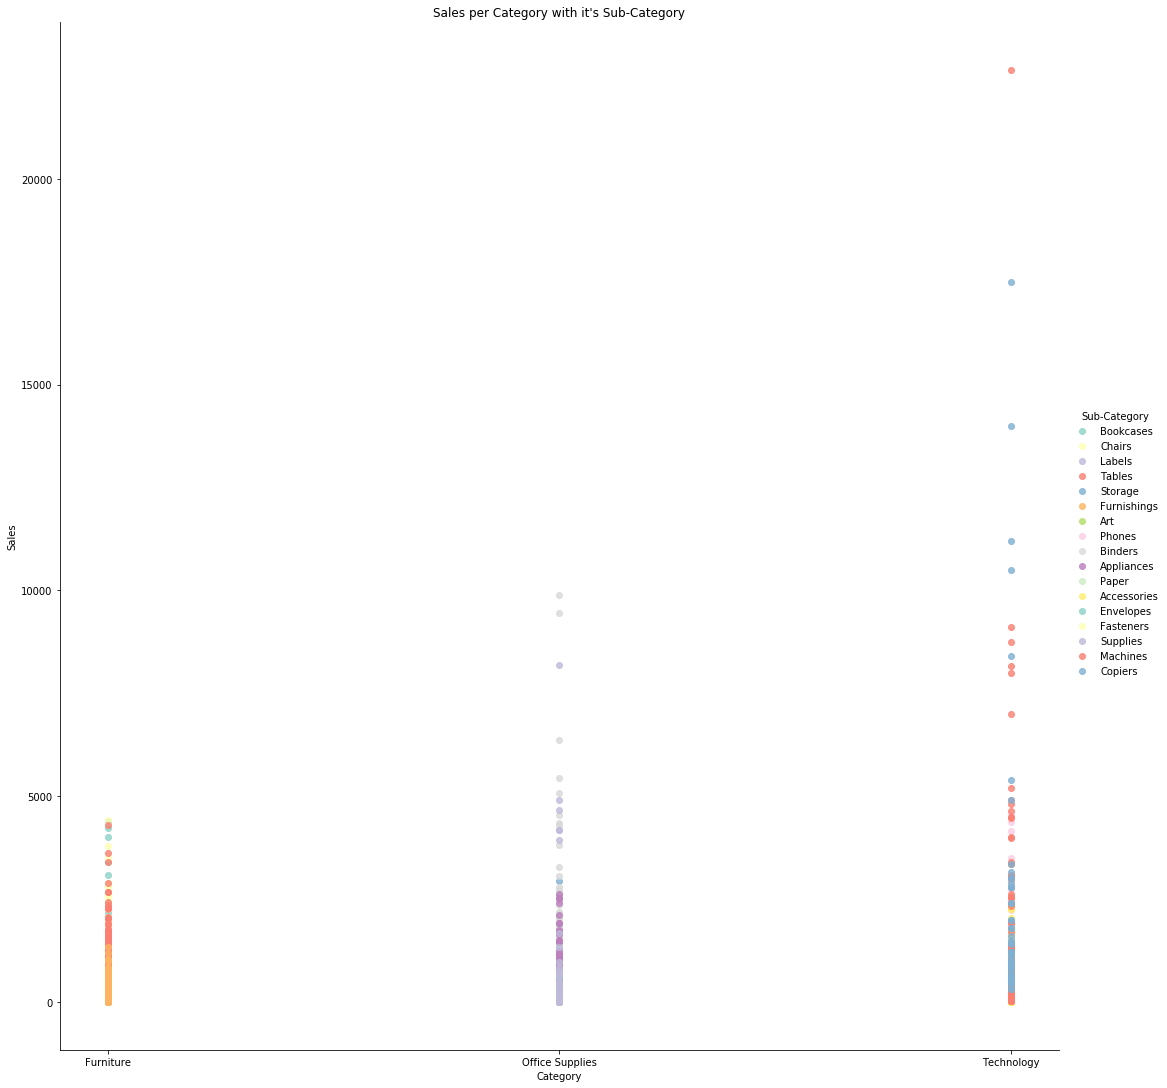

In [19]:
sns.lmplot(x='Category', y='Sales', data=df2,fit_reg=False,
          hue='Sub-Category', legend=True,
          palette='Set3',size=15)
plt.title("Sales per Category with it's Sub-Category");

**By the above plot we can say the technology category has more sales value**

### The below countplots are showing the count of selected columns, by seeing each of the plots we can conclude which among those has maximum count.

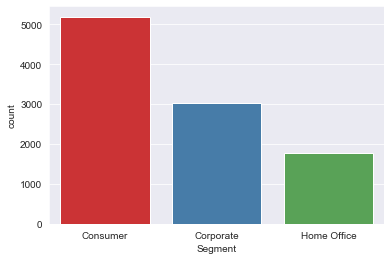

In [20]:
sns.set_style("darkgrid")
sns.countplot(x='Segment', data=df2, palette='Set1')

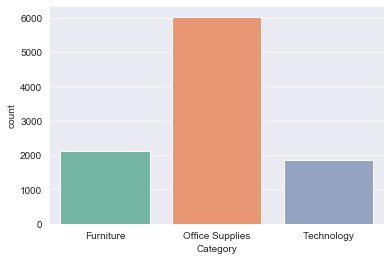

In [21]:
sns.set_style("darkgrid")
sns.countplot(x='Category', data=df2, palette='Set2')

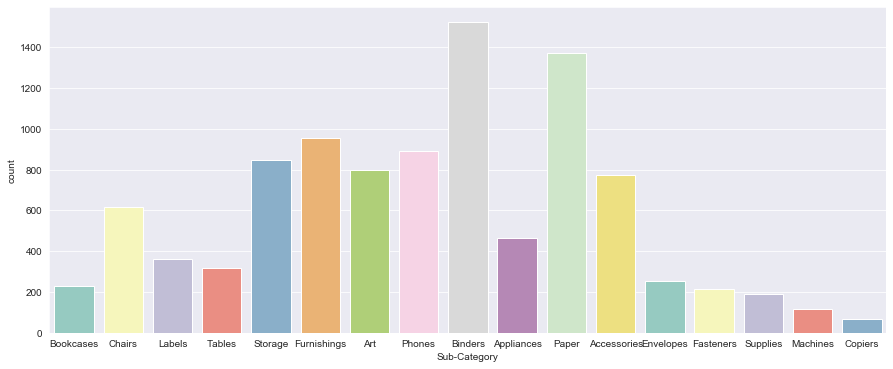

In [22]:
fig = plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x='Sub-Category', data=df2, palette='Set3')

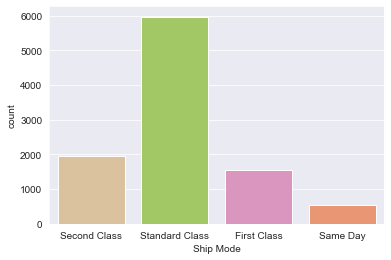

In [23]:
sns.set_style("darkgrid")
sns.countplot(x='Ship Mode', data=df2, palette='Set2_r')

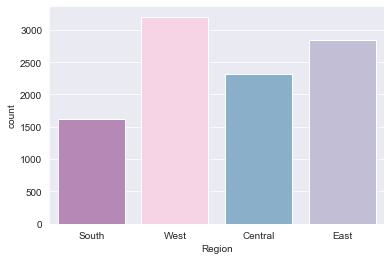

In [24]:
sns.set_style("darkgrid")
sns.countplot(x='Region', data=df2, palette='Set3_r')

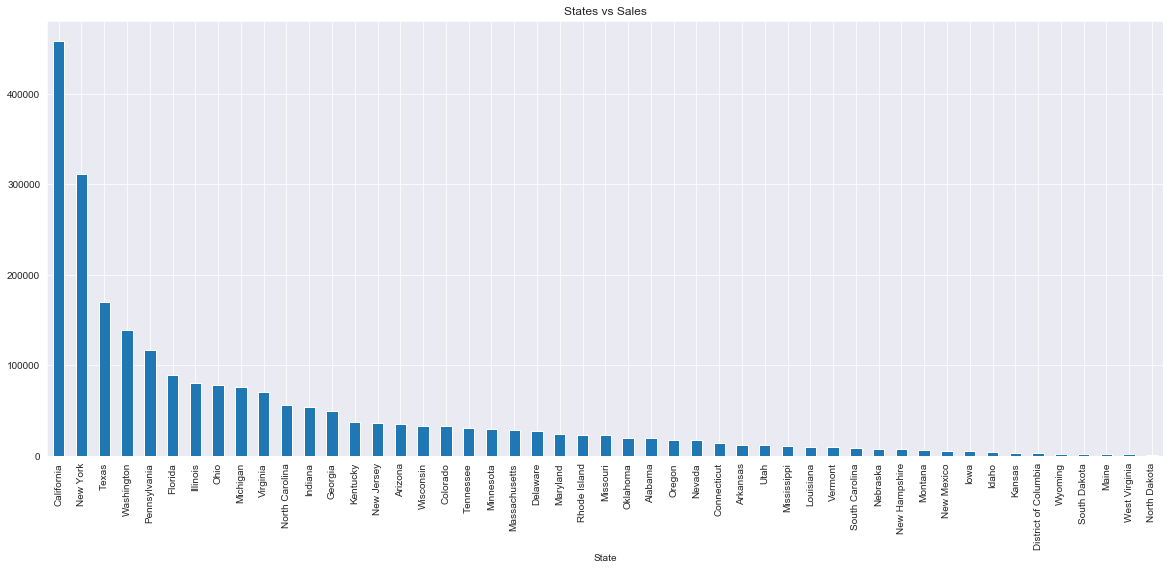

In [25]:
statewise = df2.groupby(['State'])['Sales'].sum()
statewise.sort_values(ascending=False,inplace=True)

fig,ax = plt.subplots(figsize=(20,8))
plt.title("States vs Sales")
statewise.plot.bar()

**From the above bar chart we can say that California has the highest no. of Sales**

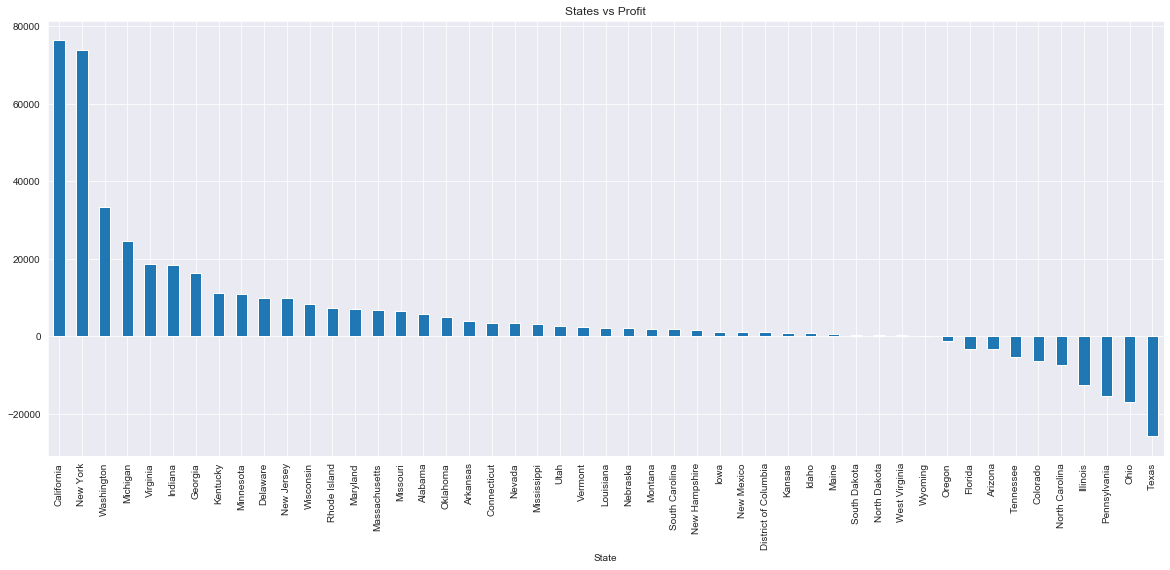

In [26]:
statewise = df2.groupby(['State'])['Profit'].sum()
statewise.sort_values(ascending=False,inplace=True)

fig,ax = plt.subplots(figsize=(20,8))
plt.title("States vs Profit")
statewise.plot.bar()

**From the above plot we can say that California and NewYork has more Profit**

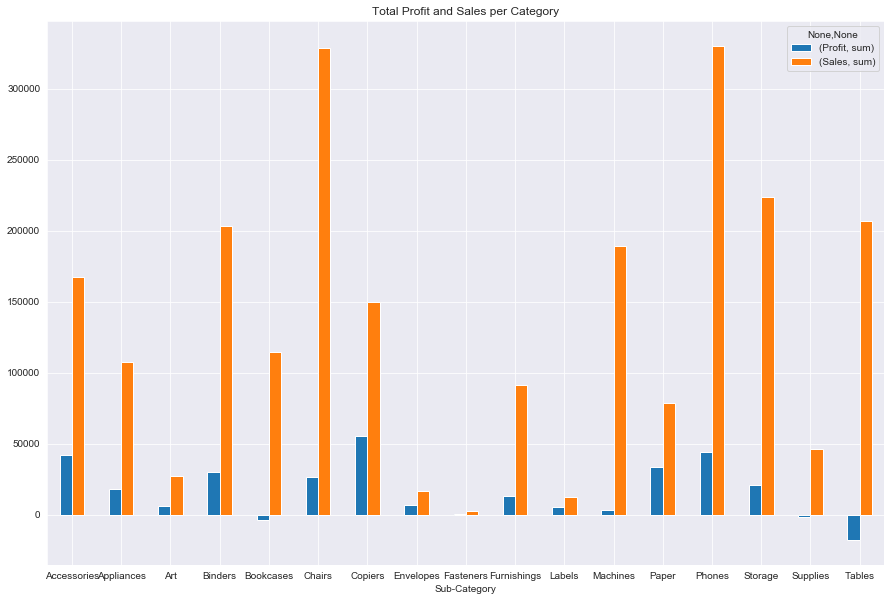

In [27]:
s = df2.groupby('Sub-Category')['Profit','Sales'].agg(['sum'])
s.plot.bar(rot=0,title='Total Profit and Sales per Category',figsize=(15,10));
plt.show(block=True);

**By seeing the above bar chart we can say that copiers have highest profit amongest other & chair,phones have highest Sales while tabels and bookcases are in loss**

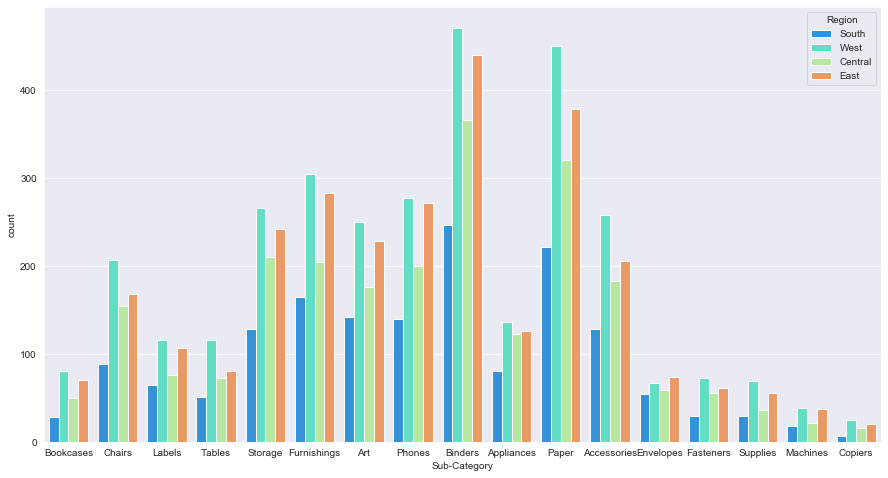

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(x='Sub-Category',hue='Region',data=df2,palette='rainbow')
plt.show()

**from the above count plot, we can conclude that people residing in the west region order more as compared to other regions**

----

## Relationship analysis

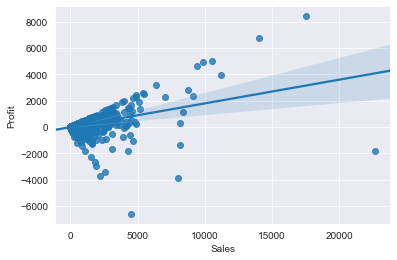

In [29]:
sns.regplot(df2['Sales'],df2['Profit'])

The above regression plot shows that with increase with Sales, Profit also increases somehow. Since it is not in linear relation, we can't say that both are directly proportional!!

### Finding the cost

In [30]:
# adding new column 'Cost' in the existing dataset
df2['Cost'] = df2['Sales'] - df2['Profit']
df2.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516


### Cost Visualization

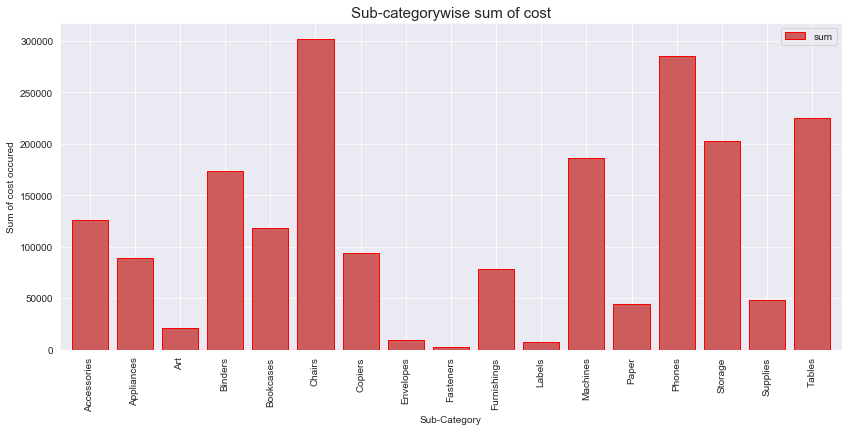

In [31]:
cost_occured = df2.groupby('Sub-Category')['Cost'].agg(['sum'])
cost_occured.plot.bar(width=0.8,figsize=(14,6), color='indianred', edgecolor='r')
plt.title('Sub-categorywise sum of cost',fontsize = 15)
plt.ylabel("Sum of cost occured")
plt.show()

**Analysis** - Retailers spending more cost on Chairs, Phones and Tables

### Visualization of total sales by sub- category

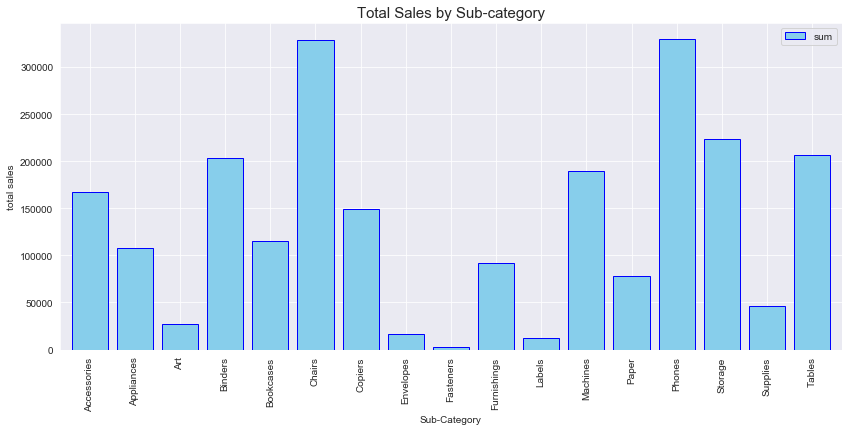

In [32]:
sub_cat_sales = df2.groupby('Sub-Category')['Sales'].agg(['sum'])
sub_cat_sales.plot.bar(width=0.8,figsize=(14,6), color='skyblue', edgecolor='blue')
plt.title('Total Sales by Sub-category',fontsize = 15)
plt.ylabel('total sales')
plt.show()

**Analysis** - The graph represents the highest total sale in Phones and chair, means most of the people buy phones and chair from this store

## Insights: 

1. Office Supplies has wide variety.
2. Technology has highest sales as compared to other categories.
3. People prefer to use standard shipment mode then others.
4. Corporate segment has highest count.
5. Product like copiers,chair,phones gives highest profit, while tabels and bookcases are in loss
6. people residing in the west region order more as compared to other regions
7. Maximum Profit earned from states like: California, NewYork, where as texas and chio gives more loss.
8. Profit and Sales are not too much related, i.e., they are not directly proportional.
9. Profit and Discount show very weak and positive relationship.

# Thank you